### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Cleaned Dataset

In [2]:
df = pd.read_csv('cleaned_data.csv')

### Splitting the Dataset

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = df.drop('treatment', axis=1)
y = df['treatment']


### Encoding the categorical columns

In [4]:
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


### Implementing Different Models

Importing required modules 

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

#### Getting scores of different models

Logistic Regression
Accuracy: 0.828
ROC-AUC: 0.8920494586456531
F1 Score: 0.8365019011406845
Confusion Matrix:
[[ 97  24]
 [ 19 110]]



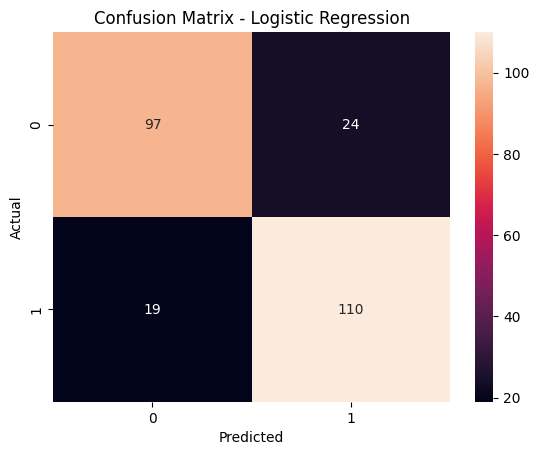

Random Forest
Accuracy: 0.78
ROC-AUC: 0.8627714779934652
F1 Score: 0.789272030651341
Confusion Matrix:
[[ 92  29]
 [ 26 103]]



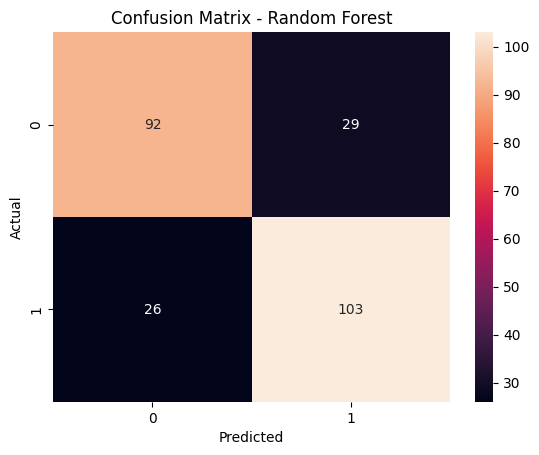

XGBoost
Accuracy: 0.8
ROC-AUC: 0.8702671535652509
F1 Score: 0.8046875
Confusion Matrix:
[[ 97  24]
 [ 26 103]]



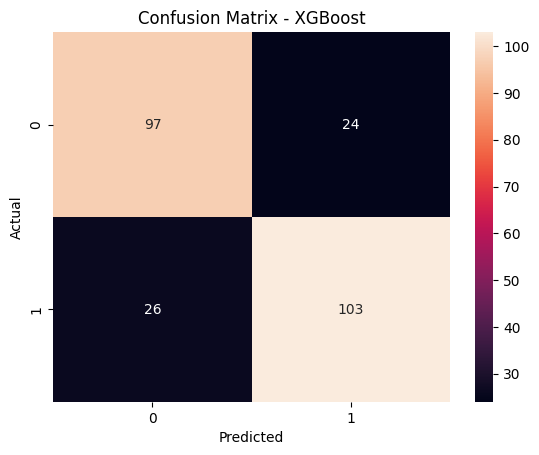

SVM
Accuracy: 0.66
ROC-AUC: 0.7433531936703184
F1 Score: 0.6502057613168725
Confusion Matrix:
[[86 35]
 [50 79]]



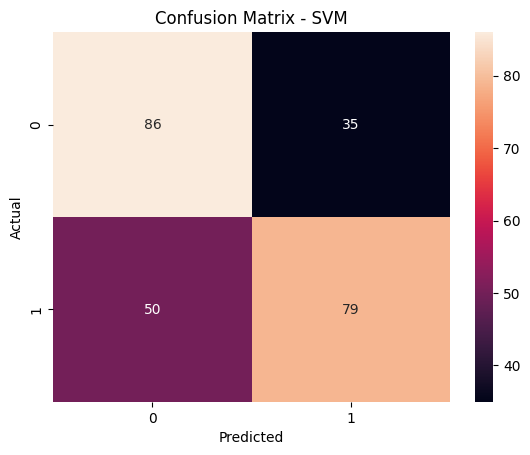

In [12]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(probability=True)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check for predict_proba or decision_function
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    elif hasattr(model, 'decision_function'):
        # Scale decision_function output to [0, 1] for ROC-AUC
        
        scaler = MinMaxScaler()
        y_pred_proba = scaler.fit_transform(model.decision_function(X_test).reshape(-1, 1)).flatten()
    else:
        y_pred_proba = None
    cm = confusion_matrix(y_test, y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 0
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'F1 Score': f1
    }

    print(name)
    print(f"Accuracy: {accuracy}")
    if y_pred_proba is not None:
        print(f"ROC-AUC: {roc_auc}")
    else:
        print("ROC-AUC: Not available for this model.")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{cm}\n")
    
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


### Finalizing the Best Model

In [18]:
# Based on Accuracy
best_model_name_accuracy = max(results, key=lambda name: results[name]['Accuracy'])
print(f"The best model based on Accuracy is: {best_model_name_accuracy} with an Accuracy score of {results[best_model_name_accuracy]['Accuracy']:.4f}")


The best model based on Accuracy is: Logistic Regression with an Accuracy score of 0.8280
